# Exponentially Weighted Moving Average
**La idea es dar más peso en la media móvil a los datos más recientes, y menos peso a los datos más antiguos**

**Ventajas:**
* Se consigue menos lag que en la SMA (Simple Moving Average)
* Datos históricos extremos no pueden distorsionar tanto la media móvil de tiempos posteriores

**Desventajas**
* Aumenta el ruido especialmente para un tamaño de ventana pequeño

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
airline = pd.read_csv('../../Resources/Data/airline_passengers.csv', index_col='Month', parse_dates=True)
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Vamos a crear una media móvil de 6 meses y otra de 12 meses**

<AxesSubplot:xlabel='Month'>

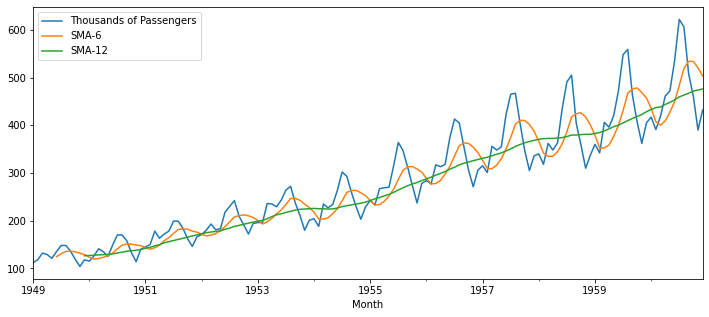

In [14]:
airline['SMA-6'] = airline['Thousands of Passengers'].rolling(6).mean()
airline['SMA-12'] = airline['Thousands of Passengers'].rolling(12).mean()
airline.plot(figsize=(12,5))

**Vamos a crear ahora la EWMA, de 12 periodos**

<AxesSubplot:xlabel='Month'>

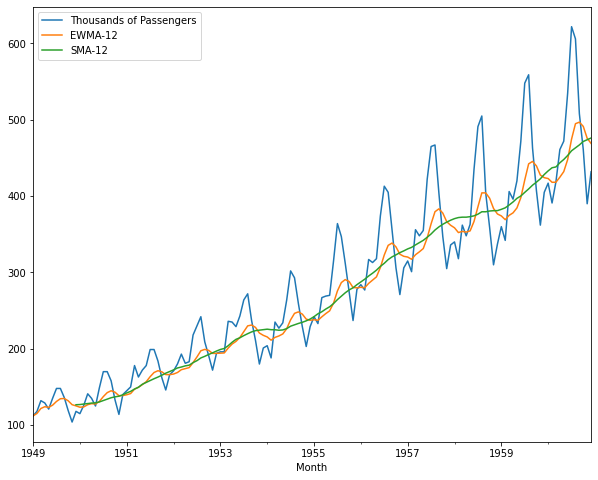

In [16]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA-12', 'SMA-12']].plot(figsize=(10,8))